In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
y = df['Class']
x = df.drop(['Time', 'Class'],axis=1)

In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [6]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


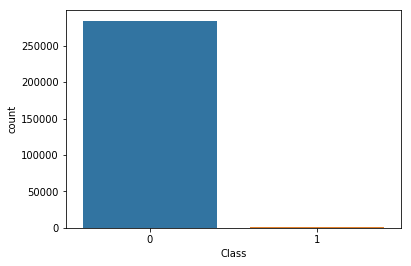

In [16]:
sns.countplot('Class', data=df)

In [17]:
print(df.groupby('Class').size())

Class
0    284315
1       492
dtype: int64


In [50]:
scl = StandardScaler()
x = scl.fit_transform(x)

In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, stratify=y)

In [83]:
def prcurve(ytest,pred):
    precision, recall, thresholds = precision_recall_curve(ytest, pred)
    print('Precision Fraud|NotFraud: ', precision[:2])
    print('Recall Fraud|NotFraud:', recall[:2])

    plt.title('Precision Recall Curve')
    plt.plot(recall, precision, 'b')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix
[[71067    12]
 [   50    73]]
Precision Fraud|NotFraud:  [0.00172748 0.85882353]
Recall Fraud|NotFraud: [1.         0.59349593]


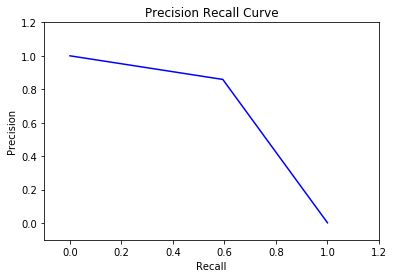

None


In [85]:
#RANDOM FOREST CLASSIFIER
clf = LogisticRegression()
clf.fit(xtrain, ytrain)
pred = clf.predict(xtest)
print('Confusion Matrix')
print(confusion_matrix(ytest,pred))
print(prcurve(ytest,pred))

In [63]:
#print(classification_report(ytest, pred))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix
[[71074     5]
 [   30    93]]
Precision Fraud|NotFraud:  [0.00172748 0.94897959]
Recall Fraud|NotFraud: [1.         0.75609756]


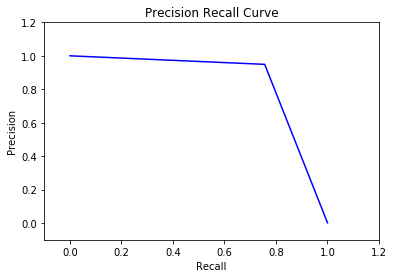

None


In [86]:
#RANDOM FOREST CLASSIFIER WITH BALANCED WEIGHTS
#BALANCED WEIGHTS: n_samples / (n_classes * np.bincount(y))
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(xtrain, ytrain)
pred = clf.predict(xtest)
print('Confusion Matrix')
print(confusion_matrix(ytest,pred))
print(prcurve(ytest,pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix
[[71067    12]
 [   50    73]]
Precision Fraud|NotFraud:  [0.00172748 0.85882353]
Recall Fraud|NotFraud: [1.         0.59349593]


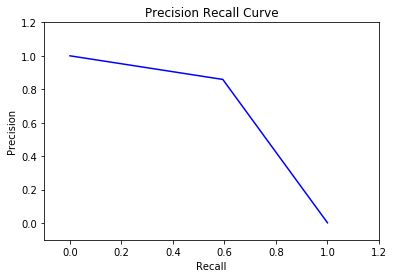

None


In [87]:
#LOGISTIC REGRESSION
clf = LogisticRegression()
clf.fit(xtrain, ytrain)
pred = clf.predict(xtest)
print('Confusion Matrix')
print(confusion_matrix(ytest,pred))
print(prcurve(ytest,pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix
[[69494  1585]
 [   14   109]]
Precision Fraud|NotFraud:  [0.00172748 0.06434475]
Recall Fraud|NotFraud: [1.         0.88617886]


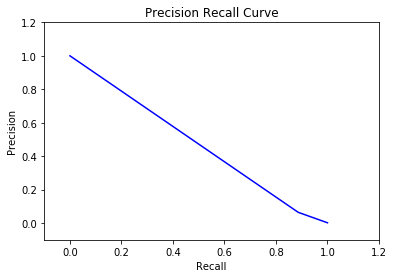

None


In [88]:
#LINEAR REGRESSION WITH BALANCED WEIGHTS
clf = LogisticRegression(class_weight='balanced')
clf.fit(xtrain, ytrain)
pred = clf.predict(xtest)
print('Confusion Matrix')
print(confusion_matrix(ytest,pred))
print(prcurve(ytest,pred))

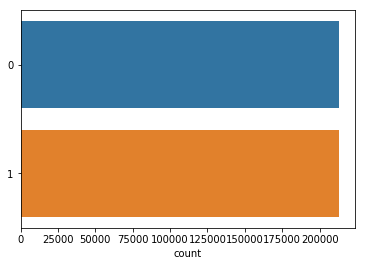

In [95]:
#WITH SMOTE OVERSAMPLING
sm = SMOTE()
os_features, os_labels = sm.fit_sample(xtrain,ytrain)
sns.countplot(y=os_labels)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix
[[71063    16]
 [   20   103]]
Precision Fraud|NotFraud:  [0.00172748 0.86554622]
Recall Fraud|NotFraud: [1.         0.83739837]


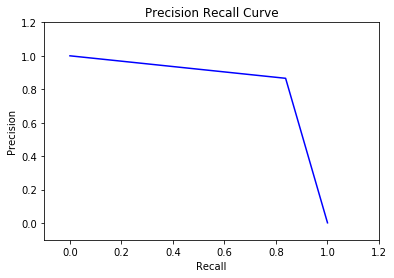

None


In [96]:
clf = RandomForestClassifier()
clf.fit(os_features, os_labels)
pred = clf.predict(xtest)
print('Confusion Matrix')
print(confusion_matrix(ytest,pred))
print(prcurve(ytest,pred))